<a href="https://colab.research.google.com/github/m-pedram/kaggleCovid/blob/main/Kaggle_Covid_Basic_Pipeline_report04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ارایه‌ی یک روش بهبود یافته برای پیش‌بینی ضرورت بستری‌شدن بیماران کووید ۱۹
# در بخش مراقبت‌های ویژه با استفاده از تکنیک‌های ترکیبی داده‌کاوی
**گزارش شماره ۴**
---


دانشجو:	مهنام پدرام

دانشکده:	مکانیک، برق و کامپیوتر

گروه تخصصی:	مهندسی نرم‌افزار

استاد راهنما:	خانم دکتر مریم رستگارپور     


In [ ]:
# Import modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
# read data from Google Drive
# from google.colab import drive 
# drive.mount('/content/drive')

data = pd.read_csv('https://raw.githubusercontent.com/m-pedram/kaggleCovid/main/Report03/rawData.csv')
filledData = data.query("PATIENT_VISIT_IDENTIFIER == 0").fillna(method='pad')
filledData = filledData.query("PATIENT_VISIT_IDENTIFIER == 0").fillna(method='backfill')
for patient_identifier in range(1,255):
  tempDf = data.query("PATIENT_VISIT_IDENTIFIER == @patient_identifier").fillna(method='pad')
  tempDf2 = tempDf.query("PATIENT_VISIT_IDENTIFIER == @patient_identifier").fillna(method='backfill')
  filledData = pd.concat([filledData, tempDf2])

pd.set_option('display.max_rows',300) # Set display rows to 300 
pd.set_option('display.max_columns',300) # Set Display columns to 300
filledData.head()
# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imp.fit(filledData)
# table = imp.transform(filledData)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MIN,BE_ARTERIAL_MIN,BE_VENOUS_MIN,BIC_ARTERIAL_MIN,BIC_VENOUS_MIN,BILLIRUBIN_MIN,BLAST_MIN,CALCIUM_MIN,CREATININ_MIN,FFA_MIN,GGT_MIN,GLUCOSE_MIN,HEMATOCRITE_MIN,HEMOGLOBIN_MIN,INR_MIN,LACTATE_MIN,LEUKOCYTES_MIN,LINFOCITOS_MIN,NEUTROPHILES_MIN,P02_ARTERIAL_MIN,P02_VENOUS_MIN,PC02_ARTERIAL_MIN,PC02_VENOUS_MIN,PCR_MIN,PH_ARTERIAL_MIN,PH_VENOUS_MIN,PLATELETS_MIN,POTASSIUM_MIN,SAT02_ARTERIAL_MIN,SAT02_VENOUS_MIN,SODIUM_MIN,TGO_MIN,TGP_MIN,TTPA_MIN,UREA_MIN,DIMER_MIN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU?Prediction
0,0,1,0.2,0,0,0,0,0,1,1,0,0,1,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,1
1,0,1,0.2,0,0,0,0,0,1,1,0,0,1,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,1
2,0,1,0.2,0,0,0,0,0,1,1,0,0,1,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,1
3,0,1,0.2,0,0,0,0,0,1,1,0,0,1,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.1

In [ ]:
# Create a dataframe that identify for every patient if any of its ICU values more than 0
Patient_Visit_Identifier = filledData['PATIENT_VISIT_IDENTIFIER']
filledData.drop( ['PATIENT_VISIT_IDENTIFIER'], axis = 1, inplace = True)

In [ ]:
patients_admitted = filledData['ICU?Prediction'].sum()/ len(filledData)
print('Percentage of patients admitted to ICU : {:.2f}%'.format (patients_admitted*100))

Percentage of patients admitted to ICU : 26.92%


In [ ]:
filledData.fillna(method='ffill', inplace = True) # ffill forward filling of nulls
filledData.fillna(method='bfill', inplace = True) # bfill backward filling of nulls for the values in the first rows
filledData.isna().sum().all() 

False

In [ ]:
# remove duplicate rows
print(filledData.duplicated().sum())
filledData.drop_duplicates(inplace = True)
filledData.duplicated().sum()

243


0

In [ ]:
filledData.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 623
Data columns (total 85 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AGE_ABOVE65                       381 non-null    int64  
 1   AGE_PERCENTIL                     381 non-null    float64
 2   GENDER                            381 non-null    int64  
 3   DISEASE GROUPING 1                381 non-null    int64  
 4   DISEASE GROUPING 2                381 non-null    int64  
 5   DISEASE GROUPING 3                381 non-null    int64  
 6   DISEASE GROUPING 4                381 non-null    int64  
 7   DISEASE GROUPING 5                381 non-null    int64  
 8   DISEASE GROUPING 6                381 non-null    int64  
 9   HTN                               381 non-null    int64  
 10  IMMUNOCOMPROMISED                 381 non-null    int64  
 11  OTHER                             381 non-null    int64  
 12  ALBUMIN_

In [ ]:
ICU_admitted = filledData['ICU?Prediction']
filledData.drop( ['ICU?Prediction'], axis = 1, inplace = True)

In [ ]:
def model(df, target):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics
    df_test = df.copy()
    # target = 'ICU_admitted'
    y = target
    X = df_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
    clf = RandomForestClassifier(max_depth=30, n_estimators=100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Record Model Metrix
    print("Accuracy:{:.6f}".format(metrics.accuracy_score(y_test, y_pred)))
    print("Precision:{:.6f}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall:{:.6f}".format(metrics.recall_score(y_test, y_pred)))
    print("f1_score:{:.6f}".format(metrics.f1_score(y_test, y_pred)))
    
    # Print Confusion Matrix
    confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)) 
    sb.heatmap(confusion_matrix, annot=True, cmap="Blues")
    
    return metrics.accuracy_score(y_test, y_pred)

Accuracy:0.913793
Precision:0.916667
Recall:0.733333
f1_score:0.814815


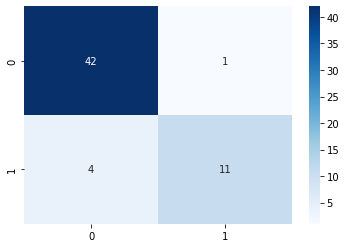

In [ ]:
score_all = model(filledData, ICU_admitted)

In [ ]:
!pip install opendatasets --upgrade --quiet
!pip install catboost --quiet
!pip install lightgbm --quiet
!pip install xgboost --quiet
!pip install hyperopt --quiet
!pip install mlxtend --quiet

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
import opendatasets as od
import warnings
warnings.filterwarnings("ignore")
import sys
import six
sys.modules['sklearn.externals.six'] = six 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import functools
from itertools import combinations
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import xgboost as xgb

plt.style.use("fivethirtyeight")
%matplotlib inline

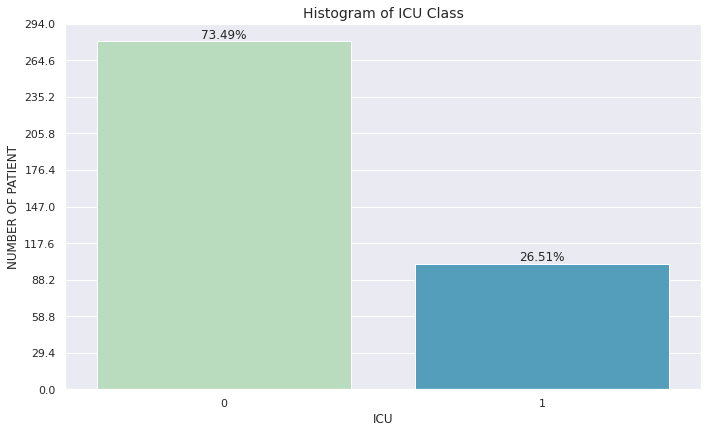

In [ ]:
ax = sb.countplot(ICU_admitted, palette='GnBu')
sb.set(font_scale = 1)
ax.set_xlabel("ICU")
ax.set_ylabel("NUMBER OF PATIENT")
fig = plt.gcf()
fig.set_size_inches(10,6)
ncount = len(ICU_admitted)
for p in ax.patches:
        x = p.get_bbox().get_points()[:, 0]
        y = p.get_bbox().get_points()[1, 1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),ha='center', va='bottom')  # set the alignment of the text
    
    # Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

plt.tight_layout()
plt.title('Histogram of ICU Class', fontsize=14)
plt.show()

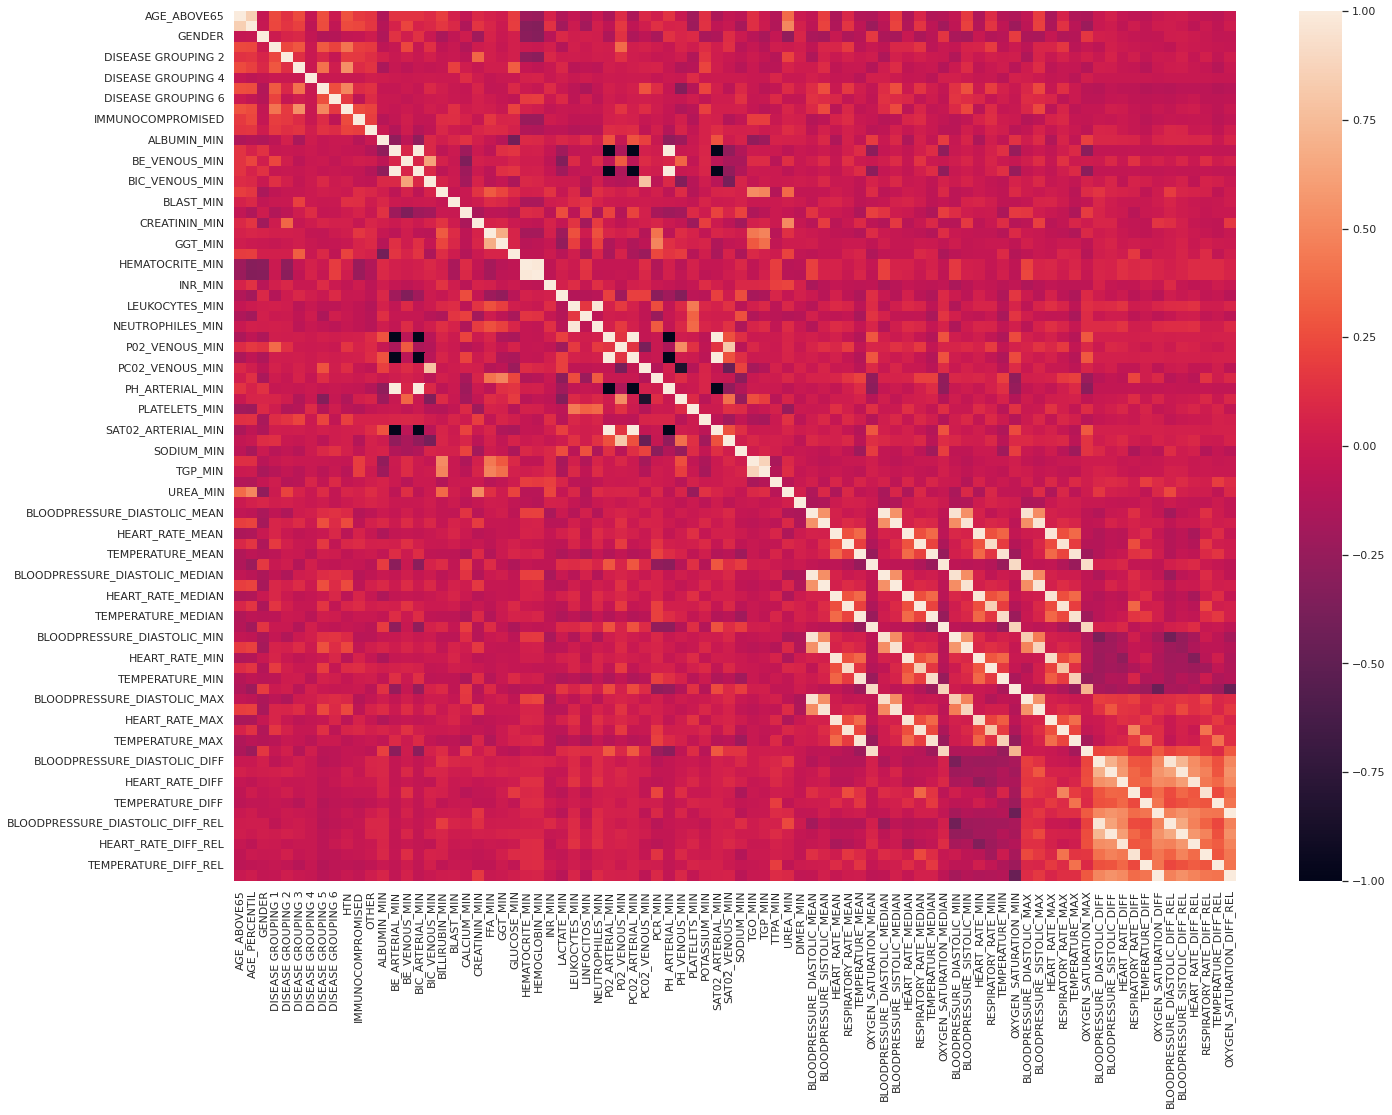

In [ ]:
df_corr = filledData.corr()
sb.set(rc={"figure.figsize": (20, 16)})
sb.heatmap(df_corr)

In [ ]:
# Show correlation values in stacked format
def rank_correlation_score (data):
    
    # Stacked correlation map into 3-columns format
    stacked_corr = data.corr().stack().reset_index().rename(
        columns = {"level_0":"Feature_1",
                   "level_1":"Feature_2",
                   0: "Pearson_Correlation"})
    
    # Remove redudant relationships
    stacked_corr = stacked_corr.query('Feature_1 != Feature_2')
    chained_feature_names = ['-'.join(np.sort(x)) for x in stacked_corr[['Feature_1', 'Feature_2']].values]
    stacked_corr.loc[:,'Duplicate_Key'] = chained_feature_names
    stacked_corr = stacked_corr.drop_duplicates(subset = 'Duplicate_Key').drop(columns = 'Duplicate_Key')

    #Remove correlations to the target
    stacked_corr = stacked_corr[stacked_corr['Feature_1'] != 'ICU']
    stacked_corr = stacked_corr[stacked_corr['Feature_2'] != 'ICU']
    
    # Order absolute correlation strenght
    stacked_corr['Pearson_Correlation'] = abs(stacked_corr['Pearson_Correlation'])
    return stacked_corr.sort_values(by='Pearson_Correlation', ascending=False)


stacked_df_corr = rank_correlation_score(filledData)
stacked_df_corr

,Feature_1,Feature_2,Pearson_Correlation
1128,BE_ARTERIAL_MIN,PH_ARTERIAL_MIN,1.000000
1300,BIC_ARTERIAL_MIN,SAT02_ARTERIAL_MIN,1.000000
1125,BE_ARTERIAL_MIN,PC02_ARTERIAL_MIN,1.000000
1291,BIC_ARTERIAL_MIN,P02_ARTERIAL_MIN,1.000000
1123,BE_ARTERIAL_MIN,P02_ARTERIAL_MIN,1.000000
...,...,...,...
546,DISEASE GROUPING 4,SODIUM_MIN,0.000280
1398,BIC_VENOUS_MIN,BLOODPRESSURE_DIASTOLIC_MEDIAN,0.000155
1362,BIC_VENOUS_MIN,BLAST_MIN,0.000153
520,DISEASE GROUPING 4,BIC_VENOUS_MIN,0.000113


In [ ]:
#Filter very strong correlations
stacked_df_corr[stacked_df_corr['Pearson_Correlation'] > 0.99]

,Feature_1,Feature_2,Pearson_Correlation
1128,BE_ARTERIAL_MIN,PH_ARTERIAL_MIN,1.000000
1300,BIC_ARTERIAL_MIN,SAT02_ARTERIAL_MIN,1.000000
1125,BE_ARTERIAL_MIN,PC02_ARTERIAL_MIN,1.000000
1291,BIC_ARTERIAL_MIN,P02_ARTERIAL_MIN,1.000000
1123,BE_ARTERIAL_MIN,P02_ARTERIAL_MIN,1.000000
2812,PC02_ARTERIAL_MIN,SAT02_ARTERIAL_MIN,1.000000
1132,BE_ARTERIAL_MIN,SAT02_ARTERIAL_MIN,1.000000
2640,P02_ARTERIAL_MIN,PH_ARTERIAL_MIN,1.000000
1296,BIC_ARTERIAL_MIN,PH_ARTERIAL_MIN,1.000000
1107,BE_ARTERIAL_MIN,BIC_ARTERIAL_MIN,1.000000


In [ ]:
#Investigate MEAN/MEDIAN correlations
stacked_df_corr['MEASURE_FEATURE_1'] = [x.split('_')[0] for x in stacked_df_corr['Feature_1']]
stacked_df_corr['MEASURE_FEATURE_2'] = [x.split('_')[0] for x in stacked_df_corr['Feature_2']]
stacked_df_corr['TYPE_FEATURE_1'] = [x.split('_')[-1] for x in stacked_df_corr['Feature_1']]
stacked_df_corr['TYPE_FEATURE_2'] = [x.split('_')[-1] for x in stacked_df_corr['Feature_2']]

mean_median_corr = stacked_df_corr.query('MEASURE_FEATURE_1 == MEASURE_FEATURE_2')
mean_median_corr = mean_median_corr.query('TYPE_FEATURE_1 != TYPE_FEATURE_2')
mean_median_corr = mean_median_corr[mean_median_corr['TYPE_FEATURE_1'].isin(['MEDIAN', 'MEAN'])]
mean_median_corr = mean_median_corr[mean_median_corr['TYPE_FEATURE_2'].isin(['MEDIAN', 'MEAN'])]

relevant_cols = ['Feature_1', 'Feature_2', 'Pearson_Correlation']
mean_median_corr[relevant_cols]

,Feature_1,Feature_2,Pearson_Correlation
4256,HEART_RATE_MEAN,HEART_RATE_MEDIAN,0.996628
4171,BLOODPRESSURE_SISTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEDIAN,0.996262
4086,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,0.991894
4426,TEMPERATURE_MEAN,TEMPERATURE_MEDIAN,0.990118
4341,RESPIRATORY_RATE_MEAN,RESPIRATORY_RATE_MEDIAN,0.985694
4511,OXYGEN_SATURATION_MEAN,OXYGEN_SATURATION_MEDIAN,0.980542
4087,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEDIAN,0.550592
4170,BLOODPRESSURE_SISTOLIC_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,0.536522


In [ ]:
diff_corr = stacked_df_corr.query('MEASURE_FEATURE_1 == MEASURE_FEATURE_2')
diff_corr = diff_corr.query('TYPE_FEATURE_1 != TYPE_FEATURE_2')
diff_corr = diff_corr[diff_corr['TYPE_FEATURE_1'].isin(['DIFF', 'REL'])]
diff_corr = diff_corr[diff_corr['TYPE_FEATURE_2'].isin(['DIFF', 'REL'])]

diff_corr[relevant_cols]

,Feature_1,Feature_2,Pearson_Correlation
6466,TEMPERATURE_DIFF,TEMPERATURE_DIFF_REL,0.999672
6551,OXYGEN_SATURATION_DIFF,OXYGEN_SATURATION_DIFF_REL,0.998998
6211,BLOODPRESSURE_SISTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF_REL,0.986631
6296,HEART_RATE_DIFF,HEART_RATE_DIFF_REL,0.975792
6126,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,0.966864
6381,RESPIRATORY_RATE_DIFF,RESPIRATORY_RATE_DIFF_REL,0.954837
6127,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF_REL,0.719326
6210,BLOODPRESSURE_SISTOLIC_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,0.629049


In [ ]:
from itertools import combinations
def check_one_to_one(df, columns):

    # Check for one column
    if len(columns) == 1:
        return True

    # Check for 2 or more columns
    result = df.groupby(columns).count()
    uniqueness = [result.index.get_level_values(
        i).is_unique for i in range(result.index.nlevels)]

    return all(uniqueness)


# Getting combinations of all the columns
combinations = list(combinations(filledData.columns, 2))

# Running to see if any of them are identical
identical_columns = []

for column in np.arange(0, len(combinations), 1):
    x = [combinations[column][0], combinations[column][1]]
    if check_one_to_one(filledData, x) == True:
        identical_columns.append(combinations[column][0])

In [ ]:
df_new = filledData.copy()  # Copy the dataset
all_columns = [x for x in df_new.columns if x not in identical_columns]
df_new = df_new.loc[:, all_columns]

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 623
Data columns (total 79 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AGE_ABOVE65                       381 non-null    int64  
 1   AGE_PERCENTIL                     381 non-null    float64
 2   GENDER                            381 non-null    int64  
 3   DISEASE GROUPING 1                381 non-null    int64  
 4   DISEASE GROUPING 2                381 non-null    int64  
 5   DISEASE GROUPING 3                381 non-null    int64  
 6   DISEASE GROUPING 4                381 non-null    int64  
 7   DISEASE GROUPING 5                381 non-null    int64  
 8   DISEASE GROUPING 6                381 non-null    int64  
 9   HTN                               381 non-null    int64  
 10  IMMUNOCOMPROMISED                 381 non-null    int64  
 11  OTHER                             381 non-null    int64  
 12  ALBUMIN_

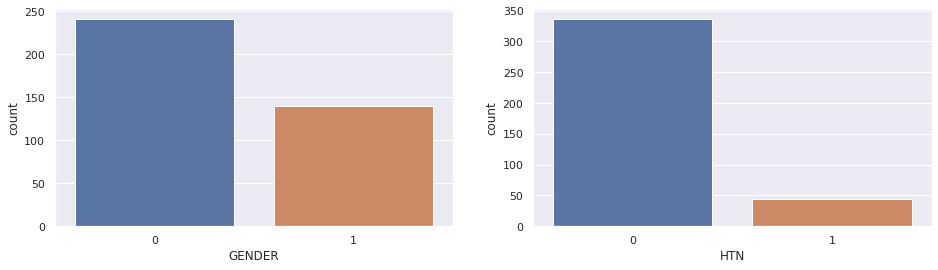

In [ ]:
#GENDER and HTN
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
sb.countplot(df_new['GENDER'], ax=axis[0])
sb.countplot(df_new['HTN'], ax=axis[1])
plt.show(fig)

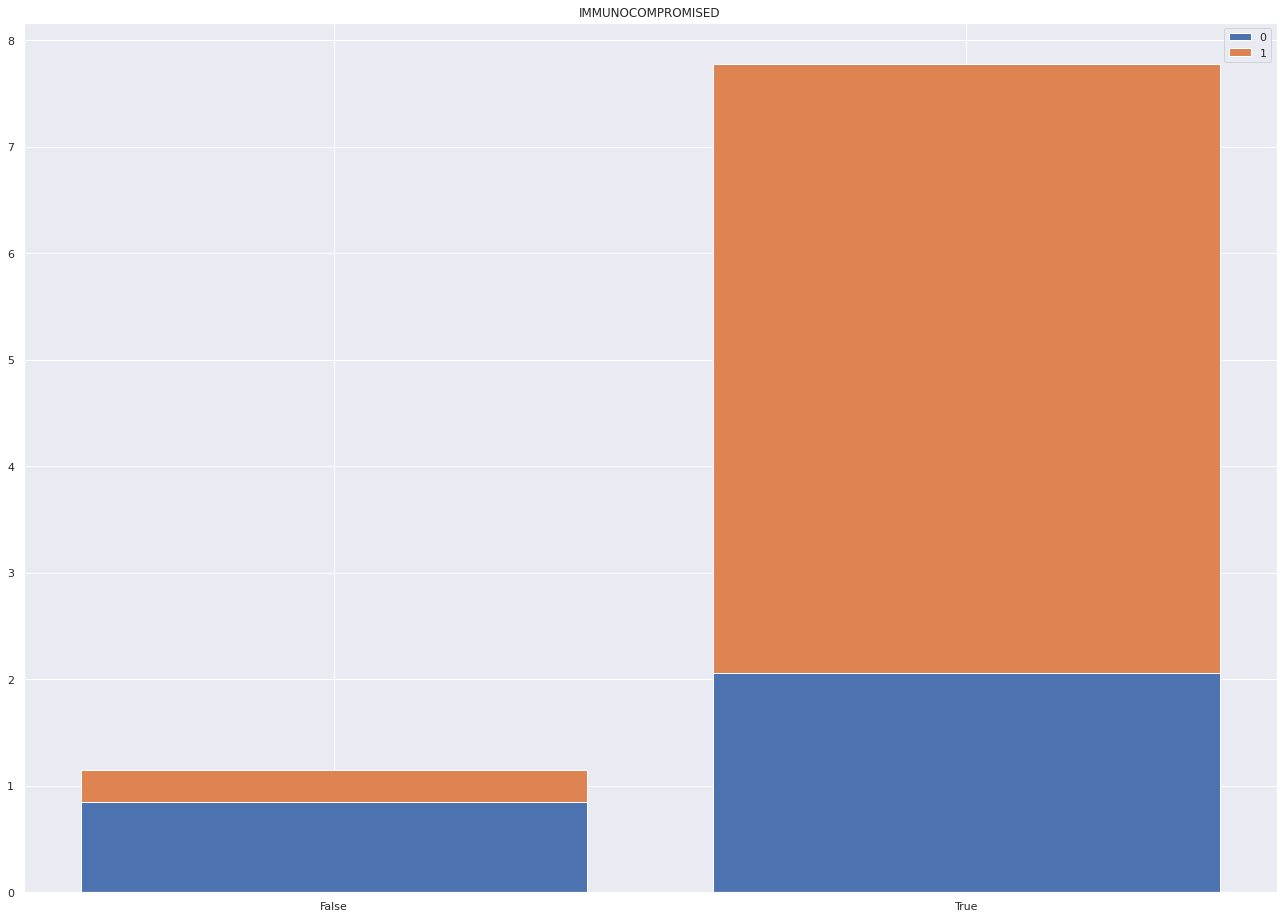

In [ ]:
def normalized_stacked_bars(data, col, target):

    bottom = [0 for x in data[col].unique()]
    for cls in target.unique():
        x_vals, y_vals = np.unique(target == cls, return_counts = True)
        x_vals = [str(x) for x in x_vals] 
        y_vals = [x / y for x, y in zip(y_vals, np.unique(data[col], return_counts = True)[1])]
        
        plt.bar(x_vals, y_vals, bottom = bottom)
        bottom = [x + y for x, y in zip(bottom, y_vals)]
    
    plt.legend(np.unique(target))
    plt.title(col)
    
    return plt.show()

normalized_stacked_bars(df_new, 'IMMUNOCOMPROMISED', ICU_admitted)

In [ ]:
col_groups = [x for x in df_new.columns.values]
col_groups = np.unique(col_groups , return_counts = True)

patient_constant_cols = [col_groups[0][x] for x in range(len(col_groups[0])) if col_groups[1][x] == 1]
patient_constant_cols

['AGE_ABOVE65',
 'AGE_PERCENTIL',
 'ALBUMIN_MIN',
 'BE_VENOUS_MIN',
 'BIC_VENOUS_MIN',
 'BILLIRUBIN_MIN',
 'BLAST_MIN',
 'BLOODPRESSURE_DIASTOLIC_DIFF',
 'BLOODPRESSURE_DIASTOLIC_DIFF_REL',
 'BLOODPRESSURE_DIASTOLIC_MAX',
 'BLOODPRESSURE_DIASTOLIC_MEAN',
 'BLOODPRESSURE_DIASTOLIC_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MIN',
 'BLOODPRESSURE_SISTOLIC_DIFF',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'BLOODPRESSURE_SISTOLIC_MAX',
 'BLOODPRESSURE_SISTOLIC_MEAN',
 'BLOODPRESSURE_SISTOLIC_MEDIAN',
 'BLOODPRESSURE_SISTOLIC_MIN',
 'CALCIUM_MIN',
 'CREATININ_MIN',
 'DIMER_MIN',
 'DISEASE GROUPING 1',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 3',
 'DISEASE GROUPING 4',
 'DISEASE GROUPING 5',
 'DISEASE GROUPING 6',
 'FFA_MIN',
 'GENDER',
 'GGT_MIN',
 'GLUCOSE_MIN',
 'HEART_RATE_DIFF',
 'HEART_RATE_DIFF_REL',
 'HEART_RATE_MAX',
 'HEART_RATE_MEAN',
 'HEART_RATE_MEDIAN',
 'HEART_RATE_MIN',
 'HEMATOCRITE_MIN',
 'HEMOGLOBIN_MIN',
 'HTN',
 'IMMUNOCOMPROMISED',
 'INR_MIN',
 'LACTATE_MIN',
 'LEUKOCYTES_MIN',
 'LIN

In [ ]:
patient_constant_cols = [x + '_1' for x in patient_constant_cols]

time_variant_cols = [x for x in df_new.columns.values if x not in patient_constant_cols]

time_variant_groups = np.unique([x for x in time_variant_cols])
print(time_variant_groups)

['AGE_ABOVE65' 'AGE_PERCENTIL' 'ALBUMIN_MIN' 'BE_VENOUS_MIN'
 'BIC_VENOUS_MIN' 'BILLIRUBIN_MIN' 'BLAST_MIN'
 'BLOODPRESSURE_DIASTOLIC_DIFF' 'BLOODPRESSURE_DIASTOLIC_DIFF_REL'
 'BLOODPRESSURE_DIASTOLIC_MAX' 'BLOODPRESSURE_DIASTOLIC_MEAN'
 'BLOODPRESSURE_DIASTOLIC_MEDIAN' 'BLOODPRESSURE_DIASTOLIC_MIN'
 'BLOODPRESSURE_SISTOLIC_DIFF' 'BLOODPRESSURE_SISTOLIC_DIFF_REL'
 'BLOODPRESSURE_SISTOLIC_MAX' 'BLOODPRESSURE_SISTOLIC_MEAN'
 'BLOODPRESSURE_SISTOLIC_MEDIAN' 'BLOODPRESSURE_SISTOLIC_MIN'
 'CALCIUM_MIN' 'CREATININ_MIN' 'DIMER_MIN' 'DISEASE GROUPING 1'
 'DISEASE GROUPING 2' 'DISEASE GROUPING 3' 'DISEASE GROUPING 4'
 'DISEASE GROUPING 5' 'DISEASE GROUPING 6' 'FFA_MIN' 'GENDER' 'GGT_MIN'
 'GLUCOSE_MIN' 'HEART_RATE_DIFF' 'HEART_RATE_DIFF_REL' 'HEART_RATE_MAX'
 'HEART_RATE_MEAN' 'HEART_RATE_MEDIAN' 'HEART_RATE_MIN' 'HEMATOCRITE_MIN'
 'HEMOGLOBIN_MIN' 'HTN' 'IMMUNOCOMPROMISED' 'INR_MIN' 'LACTATE_MIN'
 'LEUKOCYTES_MIN' 'LINFOCITOS_MIN' 'NEUTROPHILES_MIN' 'OTHER'
 'OXYGEN_SATURATION_DIFF' 'OXYGEN_SA

In [ ]:
not_cluster_friendly = ['DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 
                        'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 
                        'IMMUNOCOMPROMISED', 'OTHER']

clusters = np.unique([x.split('_')[-1] for x in time_variant_groups if x not in not_cluster_friendly])
print(clusters)


['ABOVE65' 'DIFF' 'GENDER' 'HTN' 'MAX' 'MEAN' 'MEDIAN' 'MIN' 'PERCENTIL'
 'REL']


In [ ]:
#Define function to compile all values from a feature group
def extract_values_from_group(data, group_name):
    group_cols = [x for x in data.columns.values if x == group_name]
    return data[group_cols].values.reshape(-1)

In [ ]:
#Define function to plot all feature groups from a cluster
def plot_by_cluster(data, col_groups, cluster_name):
    #Identify groups to be ploted
    groups = [x for x in col_groups if x[-len(cluster_name):] == cluster_name]
    
    #Compute dimensions for subplots
    ncols = 2
    nrows = int(len(groups) / 2) if len(groups) % 2 == 0 else np.floor(len(groups) / 2) + 1

    #Plot groups
    fig, axis = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15, 3*nrows))
    for i, group in enumerate(groups):
        row = int(i / 2)
        col = 0 if i%2 == 0 else 1
        if data[group].dtype == np.int64:
            sb.countplot(extract_values_from_group(data, group), ax = axis[row, col]).set_title(group)
        else:
            sb.distplot(extract_values_from_group(data, group), ax = axis[row, col]).set_title(group)
    
    fig.tight_layout()
    return plt.show() 

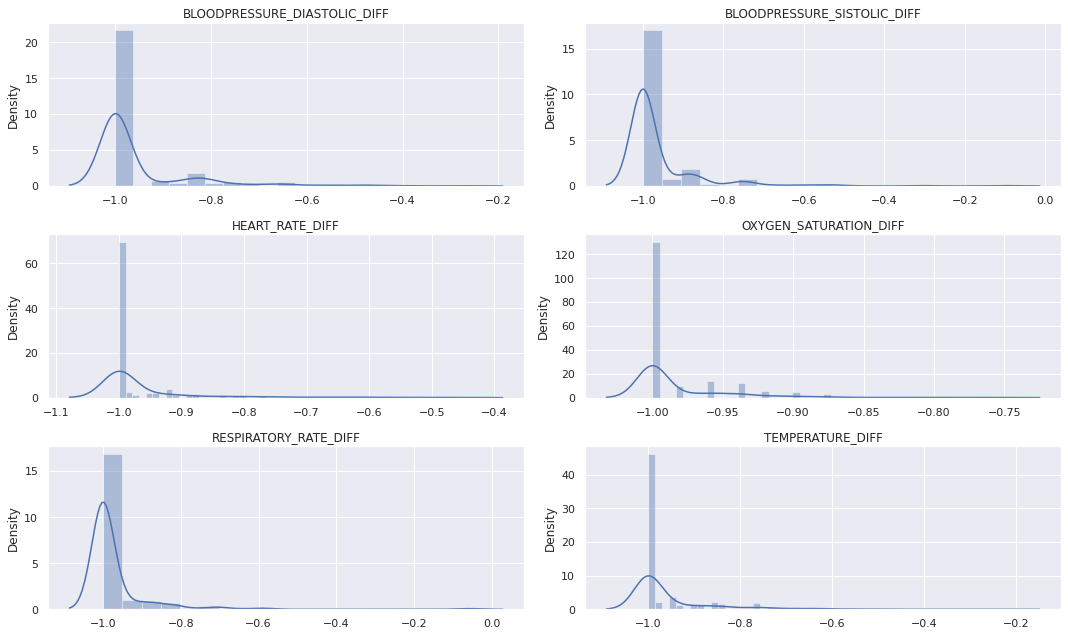

In [ ]:
# MAX
plot_by_cluster(df_new, time_variant_groups, 'DIFF')

<Figure size 864x720 with 0 Axes>

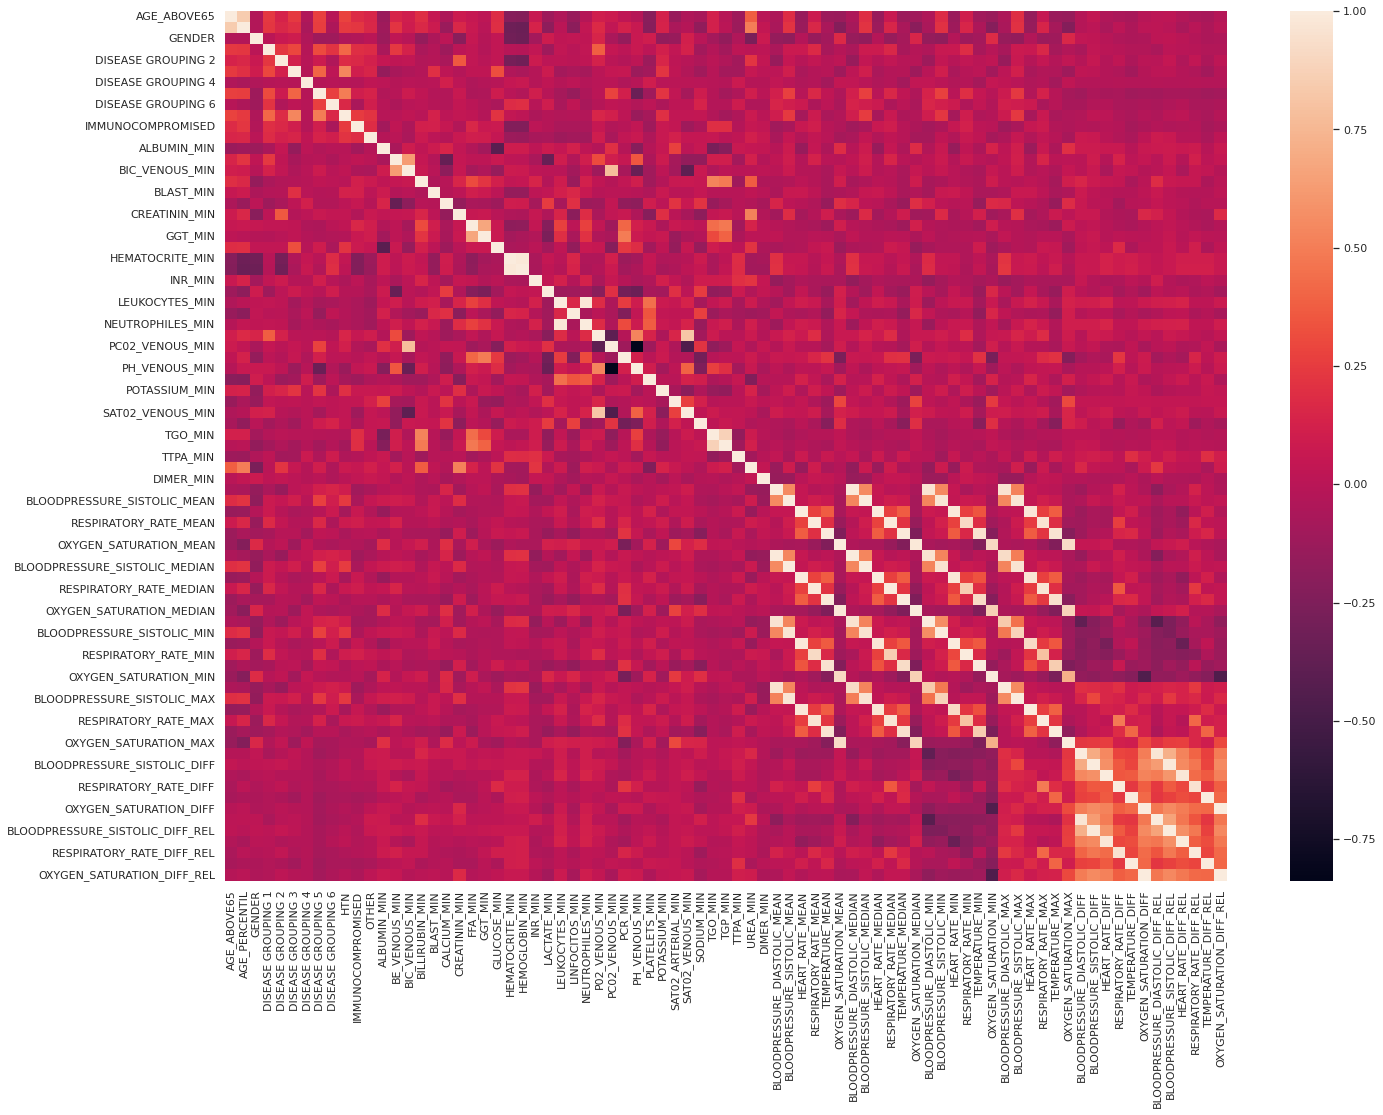

<Figure size 864x720 with 0 Axes>

In [ ]:
df_new_corr = df_new.corr()

sb.heatmap(df_new_corr)
plt.figure(figsize = (12,10))

In [ ]:
stacked_df_new_corr = rank_correlation_score(df_new)
stacked_df_new_corr

,Feature_1,Feature_2,Pearson_Correlation
5686,TEMPERATURE_DIFF,TEMPERATURE_DIFF_REL,0.999672
5766,OXYGEN_SATURATION_DIFF,OXYGEN_SATURATION_DIFF_REL,0.998998
3606,HEART_RATE_MEAN,HEART_RATE_MEDIAN,0.996628
3526,BLOODPRESSURE_SISTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEDIAN,0.996262
3446,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,0.991894
...,...,...,...
511,DISEASE GROUPING 4,SODIUM_MIN,0.000280
1155,BIC_VENOUS_MIN,BLOODPRESSURE_DIASTOLIC_MEDIAN,0.000155
1122,BIC_VENOUS_MIN,BLAST_MIN,0.000153
488,DISEASE GROUPING 4,BIC_VENOUS_MIN,0.000113


In [ ]:
stacked_df_new_corr[stacked_df_new_corr["Pearson_Correlation"] >= 0.9]

,Feature_1,Feature_2,Pearson_Correlation
5686,TEMPERATURE_DIFF,TEMPERATURE_DIFF_REL,0.999672
5766,OXYGEN_SATURATION_DIFF,OXYGEN_SATURATION_DIFF_REL,0.998998
3606,HEART_RATE_MEAN,HEART_RATE_MEDIAN,0.996628
3526,BLOODPRESSURE_SISTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEDIAN,0.996262
3446,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,0.991894
3766,TEMPERATURE_MEAN,TEMPERATURE_MEDIAN,0.990118
5446,BLOODPRESSURE_SISTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF_REL,0.986631
3686,RESPIRATORY_RATE_MEAN,RESPIRATORY_RATE_MEDIAN,0.985694
1761,HEMATOCRITE_MIN,HEMOGLOBIN_MIN,0.980904
3846,OXYGEN_SATURATION_MEAN,OXYGEN_SATURATION_MEDIAN,0.980542


In [ ]:
#Define function to test algorithm
def score_model(estimator, train_data, validation_data, cv):
    #Unpack data
    X_train, y_train = train_data
    X_validation, y_validation = validation_data
    estimate = estimator
    #Perfomed cross-validation on train data
    model_cv = cross_validate(estimator = estimator, X = X_train, y = y_train,
                              scoring = ['accuracy', 'f1', 'roc_auc'],
                              cv = cv)
   
   # Generate a no skill prediction (majority class)
    no_skill_probs = [0 for _ in range(len(y_validation))]

    #Apply model to validation data
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_validation)

    # predict probabilities
    estimator_probs = estimator.predict_proba(X_validation)

    # keep probabilities for the positive outcome only
    estimator_probs = estimator_probs[:,1]

    # calculate scores
    no_skill_auc = roc_auc_score(y_validation, no_skill_probs)
    estimator_auc = roc_auc_score(y_validation, estimator_probs)

    #Print results
    print('CV model accuracy:  %{:.2f} +/- %{:.2f}'.format(model_cv['test_accuracy'].mean()*100, model_cv['test_accuracy'].std()*100))
    print('CV model f_1 score:  %{:.2f} +/- %{:.2f}'.format(model_cv['test_f1'].mean()*100, model_cv['test_f1'].std()*100))
    print('CV model roc_auc:  %{:.2f} +/- %{:.2f}'.format(model_cv['test_roc_auc'].mean()*100, model_cv['test_roc_auc'].std()*100))
    print('Validation accuracy score: %{:.2f}'.format(accuracy_score(y_validation, y_pred)*100))
    print('Validation f_1 score: %{:.2f}'.format(f1_score(y_validation, y_pred)*100))
    print('Validation ROC_AUC score: %{:.2f}'.format(roc_auc_score(y_validation, y_pred)*100))

    print("--------")
    
    # summarize scores
    print('No Skill: ROC AUC=%{:.3f}'.format((no_skill_auc)*100))
    print('{}: ROC AUC=%{:.3f}'.format(estimator , (estimator_auc)*100))

    # calculate roc curves
    no_skill_fpr, no_skill_tpr, _ = roc_curve(y_validation, no_skill_probs)
    estimator_fpr, estimator_tpr, _ = roc_curve(y_validation, estimator_probs)

    # plot the roc curve for the model
    plt.plot(no_skill_fpr, no_skill_tpr, linestyle='--', label='No Skill')
    plt.plot(estimator_fpr, estimator_tpr, marker='.', label=estimator)

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # show the legend
    plt.legend()

    # show the plot
    plt.show()
    
    return estimator, estimator_auc

CV model accuracy:  %77.48 +/- %5.67
CV model f_1 score:  %38.76 +/- %19.72
CV model roc_auc:  %83.06 +/- %6.98
Validation accuracy score: %76.52
Validation f_1 score: %37.21
Validation ROC_AUC score: %61.15
--------
No Skill: ROC AUC=%50.000
KNeighborsClassifier(): ROC AUC=%75.091


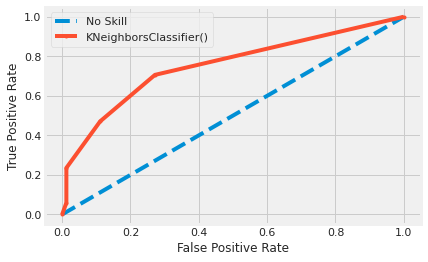

In [ ]:
np.random.seed(42)
X = df_new
y = ICU_admitted

X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.3, shuffle=True)

#Compute score for a KNN model
fitted_baseline_model_3_1, estimator_auc_3_1 = score_model(estimator=KNN(),
                                      train_data=(X_train, y_train),
                                      validation_data=(
                                          X_validation, y_validation),
                                      cv=10)

CV model accuracy:  %92.85 +/- %4.56
CV model f_1 score:  %82.87 +/- %11.82
CV model roc_auc:  %97.72 +/- %2.65
Validation accuracy score: %89.57
Validation f_1 score: %78.57
Validation ROC_AUC score: %82.35
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%92.121


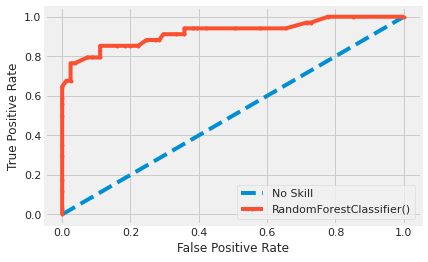

In [ ]:
baseline_model_2 = RandomForestClassifier()
fitted_baseline_model_1_2, estimator_auc_1_2 = score_model(estimator=baseline_model_2,
                                      train_data = (X_train, y_train),
                                      validation_data = (X_validation, y_validation),
                                      cv = 10)

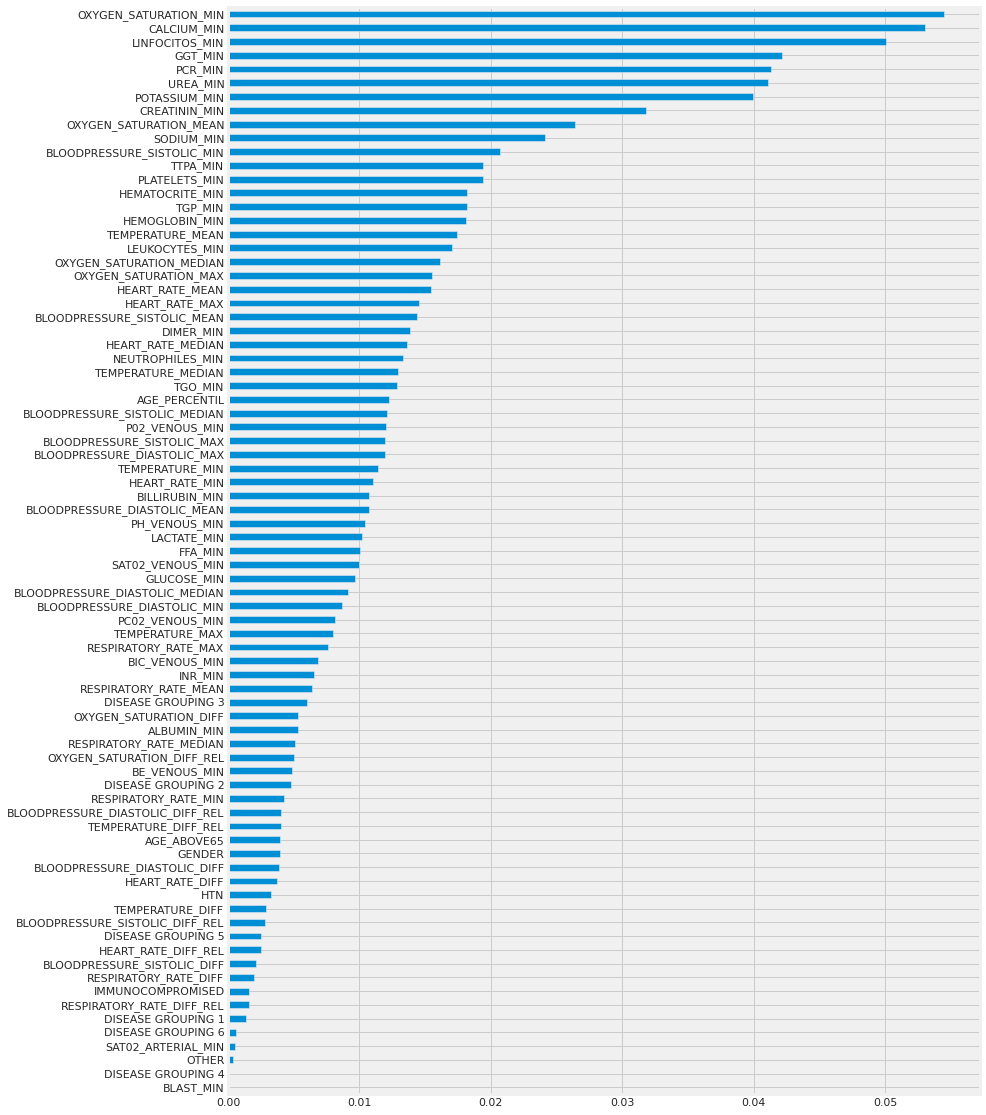

In [ ]:
feat_importances = pd.Series(data = fitted_baseline_model_1_2.feature_importances_,
                            index = df_new.columns).sort_values()
feat_importances.plot(kind = "barh", figsize = (12,20))

CV model accuracy:  %92.85 +/- %3.91
CV model f_1 score:  %83.07 +/- %10.51
CV model roc_auc:  %97.27 +/- %3.71
Validation accuracy score: %88.70
Validation f_1 score: %76.36
Validation ROC_AUC score: %80.88
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%92.647


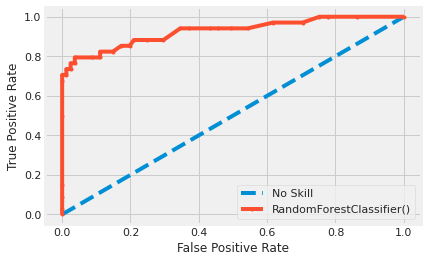

In [ ]:
#Test RandomForest model for reduced dataset
ncols_to_keep = int(0.8 * len(feat_importances))
reduced_feat_columns = feat_importances.nlargest(n = ncols_to_keep).index

reduced_x_train = X_train[reduced_feat_columns]
reduced_x_validation = X_validation[reduced_feat_columns]

fitted_baseline_model_1_3, estimator_auc_1_3 = score_model(estimator=baseline_model_2,
                                      train_data = (reduced_x_train, y_train),
                                      validation_data = (reduced_x_validation, y_validation),
                                      cv = 10)

In [ ]:
#Get RFE feature ranking and compare to RandomForestClassifier feature importance
rfe_model = RandomForestClassifier(n_estimators = 10)
feature_selector = RFE(estimator = rfe_model, step = 1)
feature_selector.fit(X_train, y_train)
feature_ranking = pd.Series(data = feature_selector.ranking_, index = df_new.columns).sort_values()

importance_scale = pd.concat([feature_ranking, feat_importances.rank(ascending = False)], axis = 1)
importance_scale = importance_scale.rename(columns = {0: 'RFE_ranking', 1: 'RFC_ranking'})
importance_scale.sort_values(by = ['RFE_ranking', 'RFC_ranking'])

,RFE_ranking,RFC_ranking
OXYGEN_SATURATION_MIN,1,1.0
CALCIUM_MIN,1,2.0
LINFOCITOS_MIN,1,3.0
GGT_MIN,1,4.0
PCR_MIN,1,5.0
UREA_MIN,1,6.0
POTASSIUM_MIN,1,7.0
CREATININ_MIN,1,8.0
OXYGEN_SATURATION_MEAN,1,9.0
SODIUM_MIN,1,10.0


CV model accuracy:  %92.09 +/- %4.60
CV model f_1 score:  %81.92 +/- %11.30
CV model roc_auc:  %96.74 +/- %4.15
Validation accuracy score: %86.96
Validation f_1 score: %73.68
Validation ROC_AUC score: %79.65
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%91.957


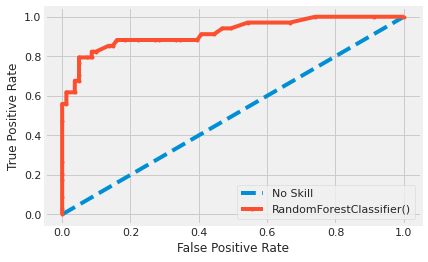

In [ ]:
#Test RandomForest model for RFE reduced dataset
cols_to_keep = importance_scale[importance_scale['RFE_ranking'] == 1].index
reduced_x_train = X_train[cols_to_keep]
reduced_x_validation = X_validation[cols_to_keep]

fitted_baseline_model_1_4, estimator_auc_1_4 = score_model(estimator=RandomForestClassifier(),
                                      train_data = (reduced_x_train, y_train),
                                      validation_data = (reduced_x_validation, y_validation),
                                      cv = 10)

In [ ]:
# Define hyperparameter space
hyperparameter_grid = {
    'n_estimators': [10, 100, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
# Perform hyperparameter tuning by grid searching the defined space
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = hyperparameter_grid,
                           scoring = "roc_auc",
                           cv = 10,
                           n_jobs = 4,
                           verbose = 1)

grid_search_results = grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
Validation accuracy: %85.22
Validation f1_score: %66.67
Validation ROC_AUC: %75.00
-----
No Skill: ROC AUC=%50.000
RandomForestClassifier: ROC AUC=%94.154


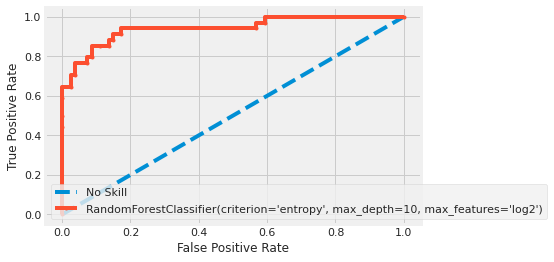

In [ ]:
# Look at the best performing set of hyperparameters and apply estimator on valdiation data
print(grid_search.best_params_)

best_gridsearch_model = grid_search.best_estimator_
best_gridsearch_model.fit(X_train, y_train)
y_pred = best_gridsearch_model.predict(X_validation)

print("Validation accuracy: %{:.2f}".format((accuracy_score(y_validation, y_pred))*100))
print("Validation f1_score: %{:.2f}".format((f1_score(y_validation, y_pred))*100))
print("Validation ROC_AUC: %{:.2f}".format((roc_auc_score(y_validation, y_pred))*100))

# Generate a no skill prediction (majority class)
no_skill_probs = [0 for _ in range(len(y_validation))]

# predict probabilities
best_gridsearch_model_probs = best_gridsearch_model.predict_proba(X_validation)

# keep probabilities for the positive outcome only
best_gridsearch_model_probs = best_gridsearch_model_probs[:,1]

# calculate scores
no_skill_auc_1 = roc_auc_score(y_validation, no_skill_probs)
best_gridsearch_model_auc_1 = roc_auc_score(y_validation, best_gridsearch_model_probs)

print("-----")

# summarize scores
print('No Skill: ROC AUC=%{:.3f}'.format((no_skill_auc_1)*100))
print('RandomForestClassifier: ROC AUC=%{:.3f}'.format((best_gridsearch_model_auc_1)*100))

# calculate roc curves
no_skill_fpr, no_skill_tpr, _ = roc_curve(y_validation, no_skill_probs)
best_gridsearch_model_fpr, best_gridsearch_model_tpr, _ = roc_curve(y_validation, best_gridsearch_model_probs)

# plot the roc curve for the model
plt.plot(no_skill_fpr, no_skill_tpr, linestyle='--', label='No Skill')
plt.plot(best_gridsearch_model_fpr, best_gridsearch_model_tpr, marker='.', label=best_gridsearch_model)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

CV model accuracy:  %92.05 +/- %4.37
CV model f_1 score:  %81.76 +/- %11.43
CV model roc_auc:  %97.70 +/- %2.29
Validation accuracy score: %90.43
Validation f_1 score: %81.36
Validation ROC_AUC score: %84.68
--------
No Skill: ROC AUC=%50.000
XGBClassifier(): ROC AUC=%94.263


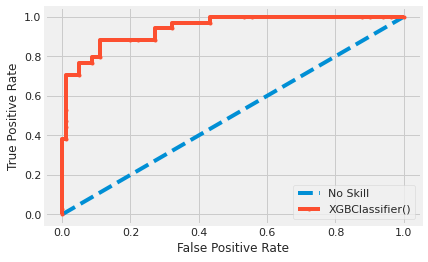

In [ ]:
baseline_model_3 = XGBClassifier()
fitted_baseline_model_1_3, estimator_auc_1_3 = score_model(estimator=baseline_model_3,
                                      train_data = (X_train, y_train),
                                      validation_data = (X_validation, y_validation),
                                      cv = 10)

In [ ]:
grid_search = GridSearchCV(estimator = XGBClassifier(),
                           param_grid = hyperparameter_grid,
                           scoring = "roc_auc",
                           cv = 10,
                           n_jobs = 4,
                           verbose = 1)

grid_search_results = grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 500}
Validation accuracy: %90.43
Validation f1_score: %81.36
Validation ROC_AUC: %84.68
-----
No Skill: ROC AUC=%50.000
RandomForestClassifier: ROC AUC=%96.550


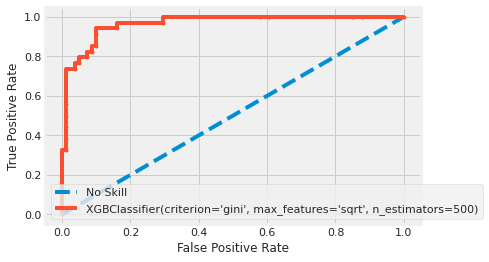

In [ ]:
# Look at the best performing set of hyperparameters and apply estimator on valdiation data
print(grid_search.best_params_)

best_gridsearch_model = grid_search.best_estimator_
best_gridsearch_model.fit(X_train, y_train)
y_pred = best_gridsearch_model.predict(X_validation)

print("Validation accuracy: %{:.2f}".format((accuracy_score(y_validation, y_pred))*100))
print("Validation f1_score: %{:.2f}".format((f1_score(y_validation, y_pred))*100))
print("Validation ROC_AUC: %{:.2f}".format((roc_auc_score(y_validation, y_pred))*100))

# Generate a no skill prediction (majority class)
no_skill_probs = [0 for _ in range(len(y_validation))]

# predict probabilities
best_gridsearch_model_probs = best_gridsearch_model.predict_proba(X_validation)

# keep probabilities for the positive outcome only
best_gridsearch_model_probs = best_gridsearch_model_probs[:,1]

# calculate scores
no_skill_auc_1 = roc_auc_score(y_validation, no_skill_probs)
best_gridsearch_model_auc_1 = roc_auc_score(y_validation, best_gridsearch_model_probs)

print("-----")

# summarize scores
print('No Skill: ROC AUC=%{:.3f}'.format((no_skill_auc_1)*100))
print('XGBClassifier: ROC AUC=%{:.3f}'.format((best_gridsearch_model_auc_1)*100))

# calculate roc curves
no_skill_fpr, no_skill_tpr, _ = roc_curve(y_validation, no_skill_probs)
best_gridsearch_model_fpr, best_gridsearch_model_tpr, _ = roc_curve(y_validation, best_gridsearch_model_probs)

# plot the roc curve for the model
plt.plot(no_skill_fpr, no_skill_tpr, linestyle='--', label='No Skill')
plt.plot(best_gridsearch_model_fpr, best_gridsearch_model_tpr, marker='.', label=best_gridsearch_model)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()